In [72]:
import re
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Data preparation and exploration

In [74]:
filename = "emotion_dataset.txt"

# Read the file
with open(filename, 'r') as file:
    lines = file.readlines()  

# Each line as a json dictionary
dataset = [json.loads(line) for line in lines]

df = pd.DataFrame(dataset)

# Mostrar las primeras filas del DataFrame
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the firepl...,2
4,i am feeling grouchy,3


In [75]:
# Check missing values
print("\nMissing values per colummn:")
print(df.isnull().sum())


Missing values per colummn:
text     0
label    0
dtype: int64


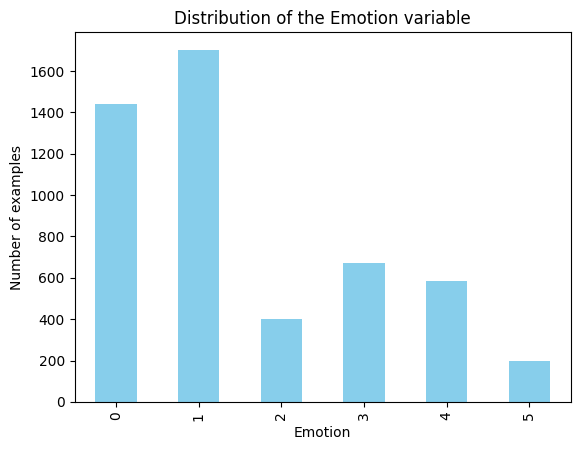

In [76]:
# Data distribution
class_distribution = df['label'].value_counts().sort_index()

class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of the Emotion variable')
plt.xlabel('Emotion')
plt.ylabel('Number of examples')
plt.show()


Stadistics:
count    5000.000000
mean       97.761600
std        56.732182
min        11.000000
25%        53.000000
50%        86.000000
75%       130.000000
max       299.000000
Name: text_length, dtype: float64


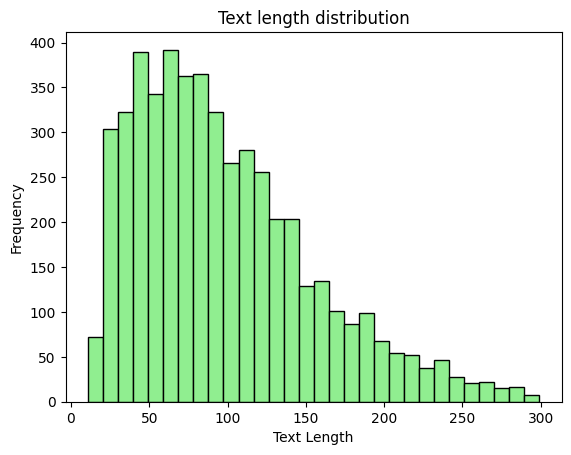

In [77]:
# Text lengths
df['text_length'] = df['text'].apply(len)

print("\nStadistics:")
print(df['text_length'].describe())

plt.hist(df['text_length'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Text length distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


In [78]:
X = df["text"]
y = df["label"]

#temporal variable to divide in test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=123)

#test and validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

X_train_half, X_temp_half, y_train_half, y_temp_half = train_test_split(X[:int(X.shape[0]/2)], y[:int(y.shape[0]/2)], test_size=0.3, random_state=123)
X_test_half, X_val_half, y_test_half, y_val_half = train_test_split(X_temp_half, y_temp_half, test_size=0.5, random_state=123)

# Sizings
print(f"Training data size: {len(X_train)}")
print(f"Validation data size: {len(X_val)}")
print(f"Test data size: {len(X_test)}")

print(f"Training data size: {len(X_train_half)}")
print(f"Validation data size: {len(X_val_half)}")
print(f"Test data size: {len(X_test_half)}")


Training data size: 3500
Validation data size: 750
Test data size: 750
Training data size: 1750
Validation data size: 375
Test data size: 375


In [79]:
# Vectorizer TF-IDF. Text format
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

X_train_half = vectorizer.fit_transform(X_train_half)
X_val_half = vectorizer.transform(X_val_half)
X_test_half = vectorizer.transform(X_test_half)

print("Training data TF-IDF: ")
print(X_train)
print(f"Validation data TF-IDF: {X_val}")
print(f"Test data TF-IDF: {X_test.shape}")

Training data TF-IDF: 
  (0, 1775)	0.08175015954924543
  (0, 2569)	0.33718221446892654
  (0, 2305)	0.2380316557283747
  (0, 554)	0.42479687749930767
  (0, 4612)	0.3839859151680079
  (0, 4304)	0.2431867516022269
  (0, 2447)	0.4100000436470819
  (0, 2372)	0.43387292622923596
  (0, 1778)	0.2821043748153612
  (1, 1775)	0.1477326965995493
  (1, 2871)	0.316108946389982
  (1, 2487)	0.25766307369578145
  (1, 4966)	0.6026780281699208
  (1, 1737)	0.31201464009188984
  (1, 2177)	0.23728799083068547
  (1, 2367)	0.2751394000356691
  (1, 4356)	0.31007989138816305
  (1, 4919)	0.3508976552544649
  (2, 1775)	0.06666259115084128
  (2, 2098)	0.2719511652616053
  (2, 1712)	0.33998658058518216
  (2, 3627)	0.34639761834142785
  (2, 4188)	0.3870776297377217
  (2, 4602)	0.26517777510768303
  (2, 2145)	0.34639761834142785
  :	:
  (3497, 2442)	0.2742486471506871
  (3497, 2083)	0.3548597602762324
  (3498, 1777)	0.1000150348983325
  (3498, 2849)	0.21467671807022104
  (3498, 3676)	0.5352491307196786
  (3498, 1996)

In [80]:
# Labels format
print(f"Tipo de y_train: {type(y_train.iloc[0])}")

y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

y_train_half = y_train_half.astype(int)
y_val_half = y_val_half.astype(int)
y_test_half = y_test_half.astype(int)


Tipo de y_train: <class 'numpy.int64'>


# Basic machine learning

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [82]:
# Majority classifier
predicted_labels = [y_train.value_counts().idxmax()]*len(y_test)
print("Majority classifier Accuracy:")
MC_accuracy_score = accuracy_score(y_test, predicted_labels)
print(MC_accuracy_score)
print('Classification Report:')
print(classification_report(y_test, predicted_labels))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predicted_labels))

Majority classifier Accuracy:
0.3373333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       219
           1       0.34      1.00      0.50       253
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00       107
           4       0.00      0.00      0.00        97
           5       0.00      0.00      0.00        24

    accuracy                           0.34       750
   macro avg       0.06      0.17      0.08       750
weighted avg       0.11      0.34      0.17       750

Confusion Matrix:
[[  0 219   0   0   0   0]
 [  0 253   0   0   0   0]
 [  0  50   0   0   0   0]
 [  0 107   0   0   0   0]
 [  0  97   0   0   0   0]
 [  0  24   0   0   0   0]]


In [83]:
# Majority classifier with half the dataset
predicted_labels = [y_train_half.value_counts().idxmax()]*len(y_test_half)
print("Majority classifier Accuracy:")
MC_accuracy_score_half = accuracy_score(y_test_half, predicted_labels)
print(MC_accuracy_score_half)
print('Classification Report:')
print(classification_report(y_test_half, predicted_labels))
print('Confusion Matrix:')
print(confusion_matrix(y_test_half, predicted_labels))

Majority classifier Accuracy:
0.34933333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       111
           1       0.35      1.00      0.52       131
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00        43
           5       0.00      0.00      0.00         8

    accuracy                           0.35       375
   macro avg       0.06      0.17      0.09       375
weighted avg       0.12      0.35      0.18       375

Confusion Matrix:
[[  0 111   0   0   0   0]
 [  0 131   0   0   0   0]
 [  0  30   0   0   0   0]
 [  0  52   0   0   0   0]
 [  0  43   0   0   0   0]
 [  0   8   0   0   0   0]]


In [84]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predicted_knn = knn.predict(X_test)
print("KNN Accuracy:")
KNN_accuracy_score = accuracy_score(y_test, predicted_knn)
print(KNN_accuracy_score)
print('Classification Report:')
print(classification_report(y_test, predicted_knn))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predicted_knn))

KNN Accuracy:
0.6866666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       219
           1       0.63      0.90      0.74       253
           2       0.67      0.40      0.50        50
           3       0.78      0.50      0.61       107
           4       0.85      0.40      0.55        97
           5       0.50      0.21      0.29        24

    accuracy                           0.69       750
   macro avg       0.69      0.53      0.57       750
weighted avg       0.71      0.69      0.67       750

Confusion Matrix:
[[169  40   1   5   3   1]
 [ 19 228   4   1   1   0]
 [  6  23  20   1   0   0]
 [ 18  34   1  54   0   0]
 [ 19  24   4   7  39   4]
 [  2  13   0   1   3   5]]


In [86]:
# KNN with half the dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_half, y_train_half)
predicted_knn = knn.predict(X_test_half)
print("KNN Accuracy:")
KNN_accuracy_score_half = accuracy_score(y_test_half, predicted_knn)
print(KNN_accuracy_score_half)
print('Classification Report:')
print(classification_report(y_test_half, predicted_knn))
print('Confusion Matrix:')
print(confusion_matrix(y_test_half, predicted_knn))

KNN Accuracy:
0.656
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.82      0.69       111
           1       0.68      0.69      0.69       131
           2       0.71      0.50      0.59        30
           3       0.71      0.58      0.64        52
           4       0.67      0.37      0.48        43
           5       1.00      0.38      0.55         8

    accuracy                           0.66       375
   macro avg       0.73      0.56      0.61       375
weighted avg       0.67      0.66      0.65       375

Confusion Matrix:
[[91 13  0  3  4  0]
 [31 91  1  5  3  0]
 [ 6  9 15  0  0  0]
 [ 9 10  2 30  1  0]
 [11  9  3  4 16  0]
 [ 3  2  0  0  0  3]]


In [87]:
# SVM
svm = SVC(C=100)
svm.fit(X_train, y_train)
predicted_svm = svm.predict(X_test)
print("SVM Accuracy:")
SVM_accuracy_score = accuracy_score(y_test, predicted_svm)
print(SVM_accuracy_score)
print('Classification Report:')
print(classification_report(y_test, predicted_svm))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predicted_svm))


SVM Accuracy:
0.792
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       219
           1       0.75      0.94      0.83       253
           2       0.75      0.54      0.63        50
           3       0.94      0.67      0.78       107
           4       0.83      0.55      0.66        97
           5       0.62      0.21      0.31        24

    accuracy                           0.79       750
   macro avg       0.78      0.64      0.68       750
weighted avg       0.80      0.79      0.78       750

Confusion Matrix:
[[200  11   1   2   5   0]
 [  9 237   5   0   2   0]
 [  6  17  27   0   0   0]
 [ 15  18   2  72   0   0]
 [ 16  21   1   3  53   3]
 [  2  13   0   0   4   5]]


In [88]:
# SVM with half the dataset
svm = SVC(C=100)
svm.fit(X_train_half, y_train_half)
predicted_svm = svm.predict(X_test_half)
print("SVM Accuracy:")
SVM_accuracy_score_half = accuracy_score(y_test_half, predicted_svm)
print(SVM_accuracy_score_half)
print('Classification Report:')
print(classification_report(y_test_half, predicted_svm))
print('Confusion Matrix:')
print(confusion_matrix(y_test_half, predicted_svm))


SVM Accuracy:
0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       111
           1       0.58      0.93      0.72       131
           2       0.71      0.17      0.27        30
           3       0.91      0.40      0.56        52
           4       0.91      0.47      0.62        43
           5       1.00      0.38      0.55         8

    accuracy                           0.68       375
   macro avg       0.81      0.52      0.58       375
weighted avg       0.74      0.68      0.66       375

Confusion Matrix:
[[ 84  26   0   1   0   0]
 [  5 122   2   1   1   0]
 [  2  23   5   0   0   0]
 [ 12  19   0  21   0   0]
 [  6  17   0   0  20   0]
 [  1   3   0   0   1   3]]


In [89]:
# Decision Trees
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=25)
dt.fit(X_train, y_train)
predicted_dt = dt.predict(X_test)
print("Decision Tree Accuracy:")
DT_accuracy_score = accuracy_score(y_test, predicted_dt)
print(DT_accuracy_score)
print('Classification Report:')
print(classification_report(y_test, predicted_dt))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predicted_dt))

Decision Tree Accuracy:
0.36933333333333335
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       219
           1       0.35      1.00      0.52       253
           2       0.00      0.00      0.00        50
           3       0.86      0.06      0.11       107
           4       0.86      0.12      0.22        97
           5       1.00      0.29      0.45        24

    accuracy                           0.37       750
   macro avg       0.51      0.24      0.22       750
weighted avg       0.38      0.37      0.23       750

Confusion Matrix:
[[  0 217   0   1   1   0]
 [  0 252   0   0   1   0]
 [  0  50   0   0   0   0]
 [  0 101   0   6   0   0]
 [  0  85   0   0  12   0]
 [  0  17   0   0   0   7]]


In [90]:
# Decision Trees with half the dataset
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=25)
dt.fit(X_train_half, y_train_half)
predicted_dt = dt.predict(X_test_half)
print("Decision Tree Accuracy:")
DT_accuracy_score_half = accuracy_score(y_test_half, predicted_dt)
print(DT_accuracy_score_half)
print('Classification Report:')
print(classification_report(y_test_half, predicted_dt))
print('Confusion Matrix:')
print(confusion_matrix(y_test_half, predicted_dt))

Decision Tree Accuracy:
0.37333333333333335
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       111
           1       0.36      1.00      0.53       131
           2       0.00      0.00      0.00        30
           3       1.00      0.12      0.21        52
           4       1.00      0.02      0.05        43
           5       0.50      0.25      0.33         8

    accuracy                           0.37       375
   macro avg       0.48      0.23      0.19       375
weighted avg       0.39      0.37      0.23       375

Confusion Matrix:
[[  0 110   0   0   0   1]
 [  0 131   0   0   0   0]
 [  0  30   0   0   0   0]
 [  0  45   0   6   0   1]
 [  0  42   0   0   1   0]
 [  0   6   0   0   0   2]]


In [91]:
# Random Forest
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
predicted_rf = rf.predict(X_test)
print("Random Forest Accuracy:")
RF_accuracy_score = accuracy_score(y_test, predicted_rf)
print(RF_accuracy_score)
print('Classification Report:')
print(classification_report(y_test, predicted_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predicted_rf))

Random Forest Accuracy:
0.812
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       219
           1       0.81      0.87      0.84       253
           2       0.67      0.74      0.70        50
           3       0.84      0.76      0.80       107
           4       0.78      0.71      0.74        97
           5       0.88      0.58      0.70        24

    accuracy                           0.81       750
   macro avg       0.80      0.75      0.77       750
weighted avg       0.81      0.81      0.81       750

Confusion Matrix:
[[187  17   1   6   7   1]
 [ 11 221  13   3   5   0]
 [  4   8  37   1   0   0]
 [  9  12   2  81   3   0]
 [ 10  11   2   4  69   1]
 [  1   3   0   1   5  14]]


In [92]:
# Random Forest with half the dataset
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train_half, y_train_half)
predicted_rf = rf.predict(X_test_half)
print("Random Forest Accuracy:")
RF_accuracy_score_half = accuracy_score(y_test_half, predicted_rf)
print(RF_accuracy_score_half)
print('Classification Report:')
print(classification_report(y_test_half, predicted_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test_half, predicted_rf))

Random Forest Accuracy:
0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       111
           1       0.58      0.89      0.70       131
           2       0.83      0.50      0.62        30
           3       0.85      0.42      0.56        52
           4       0.81      0.51      0.63        43
           5       0.57      0.50      0.53         8

    accuracy                           0.67       375
   macro avg       0.73      0.58      0.62       375
weighted avg       0.71      0.67      0.66       375

Confusion Matrix:
[[ 71  38   1   0   1   0]
 [  9 116   2   2   2   0]
 [  3  12  15   0   0   0]
 [  8  20   0  22   1   1]
 [  4  13   0   2  22   2]
 [  1   2   0   0   1   4]]


In [93]:
# Bagging
bc = BaggingClassifier()
bc.fit(X_train, y_train)
predicted_bc = bc.predict(X_test)
print("Bagging Accuracy:")
Bagging_accuracy_score = accuracy_score(y_test, predicted_bc)
print(Bagging_accuracy_score)
print('Classification Report:')
print(classification_report(y_test, predicted_bc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predicted_bc))

Bagging Accuracy:
0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       219
           1       0.83      0.87      0.85       253
           2       0.76      0.76      0.76        50
           3       0.85      0.78      0.81       107
           4       0.77      0.75      0.76        97
           5       0.70      0.58      0.64        24

    accuracy                           0.82       750
   macro avg       0.79      0.77      0.78       750
weighted avg       0.82      0.82      0.82       750

Confusion Matrix:
[[188  15   0   5  10   1]
 [ 14 219   9   5   4   2]
 [  3   8  38   1   0   0]
 [  8  11   2  83   3   0]
 [  9   8   1   3  73   3]
 [  0   4   0   1   5  14]]


In [94]:
# Bagging with half the dataset
bc = BaggingClassifier()
bc.fit(X_train_half, y_train_half)
predicted_bc = bc.predict(X_test_half)
print("Bagging Accuracy:")
Bagging_accuracy_score_half = accuracy_score(y_test_half, predicted_bc)
print(Bagging_accuracy_score_half)
print('Classification Report:')
print(classification_report(y_test_half, predicted_bc))
print('Confusion Matrix:')
print(confusion_matrix(y_test_half, predicted_bc))

Bagging Accuracy:
0.624
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.71      0.64       111
           1       0.58      0.74      0.65       131
           2       0.77      0.33      0.47        30
           3       0.85      0.42      0.56        52
           4       0.91      0.47      0.62        43
           5       0.50      0.75      0.60         8

    accuracy                           0.62       375
   macro avg       0.70      0.57      0.59       375
weighted avg       0.67      0.62      0.62       375

Confusion Matrix:
[[79 29  1  1  0  1]
 [27 97  2  2  2  1]
 [ 6 14 10  0  0  0]
 [13 16  0 22  0  1]
 [ 8 11  0  1 20  3]
 [ 2  0  0  0  0  6]]


In [95]:
# Gradiant Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
predicted_gb = gb.predict(X_test)
print("Gradiant Boosting Accuracy:")
GB_accuracy_score = accuracy_score(y_test, predicted_gb)
print(GB_accuracy_score)
print('Classification Report:')
print(classification_report(y_test, predicted_gb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predicted_gb))

Gradiant Boosting Accuracy:
0.7973333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       219
           1       0.70      0.90      0.79       253
           2       0.68      0.80      0.73        50
           3       0.89      0.72      0.79       107
           4       0.86      0.73      0.79        97
           5       0.81      0.71      0.76        24

    accuracy                           0.80       750
   macro avg       0.81      0.77      0.78       750
weighted avg       0.82      0.80      0.80       750

Confusion Matrix:
[[166  42   0   5   5   1]
 [  5 227  14   3   4   0]
 [  0  10  40   0   0   0]
 [  5  23   2  77   0   0]
 [  1  17   3   2  71   3]
 [  0   4   0   0   3  17]]


In [96]:
# Gradiant Boosting with half the dataset
gb = GradientBoostingClassifier()
gb.fit(X_train_half, y_train_half)
predicted_gb = gb.predict(X_test_half)
print("Gradiant Boosting Accuracy:")
GB_accuracy_score_half = accuracy_score(y_test_half, predicted_gb)
print(GB_accuracy_score_half)
print('Classification Report:')
print(classification_report(y_test_half, predicted_gb))
print('Confusion Matrix:')
print(confusion_matrix(y_test_half, predicted_gb))

Gradiant Boosting Accuracy:
0.7733333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.65      0.75       111
           1       0.68      0.90      0.78       131
           2       0.81      0.83      0.82        30
           3       0.97      0.69      0.81        52
           4       0.84      0.74      0.79        43
           5       0.44      0.88      0.58         8

    accuracy                           0.77       375
   macro avg       0.77      0.78      0.76       375
weighted avg       0.81      0.77      0.78       375

Confusion Matrix:
[[ 72  33   3   0   2   1]
 [  4 118   3   1   3   2]
 [  0   4  25   0   0   1]
 [  2  13   0  36   0   1]
 [  2   5   0   0  32   4]
 [  0   0   0   0   1   7]]


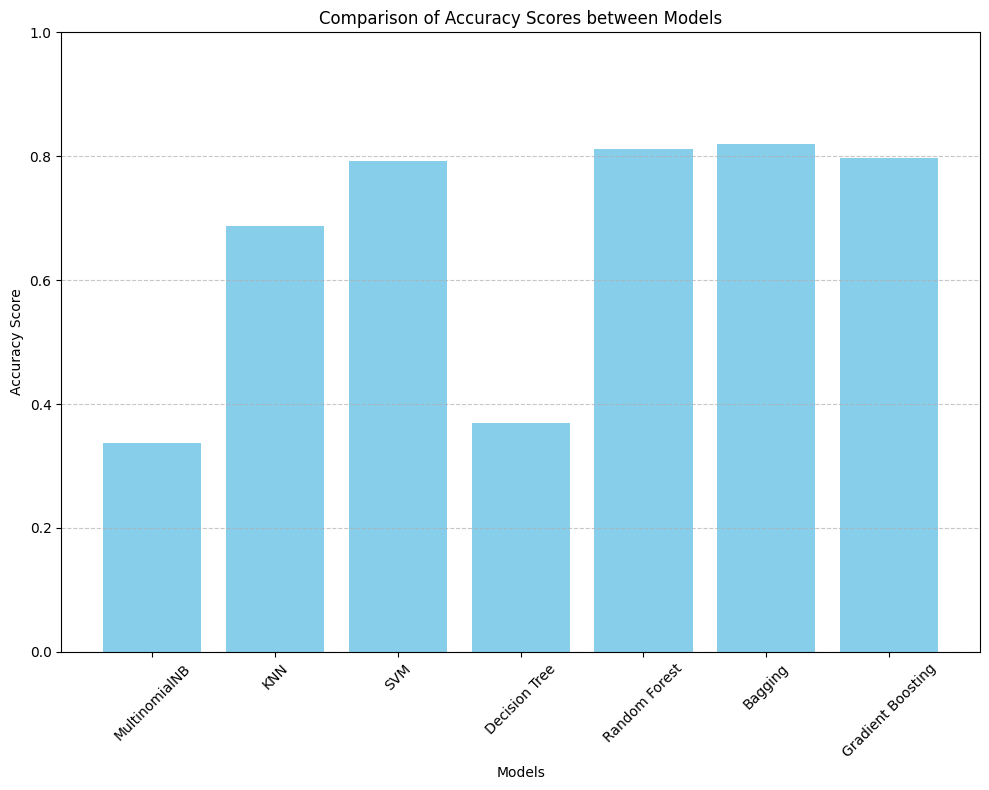

In [97]:
import matplotlib.pyplot as plt

model_names = [
    'MultinomialNB', 
    'KNN', 
    'SVM', 
    'Decision Tree', 
    'Random Forest', 
    'Bagging', 
    'Gradient Boosting'
]

# Accuracy scores for each model
accuracy_scores = [
    MC_accuracy_score, 
    KNN_accuracy_score, 
    SVM_accuracy_score, 
    DT_accuracy_score, 
    RF_accuracy_score, 
    Bagging_accuracy_score, 
    GB_accuracy_score
]


plt.figure(figsize=(10, 8))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.title('Comparison of Accuracy Scores between Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

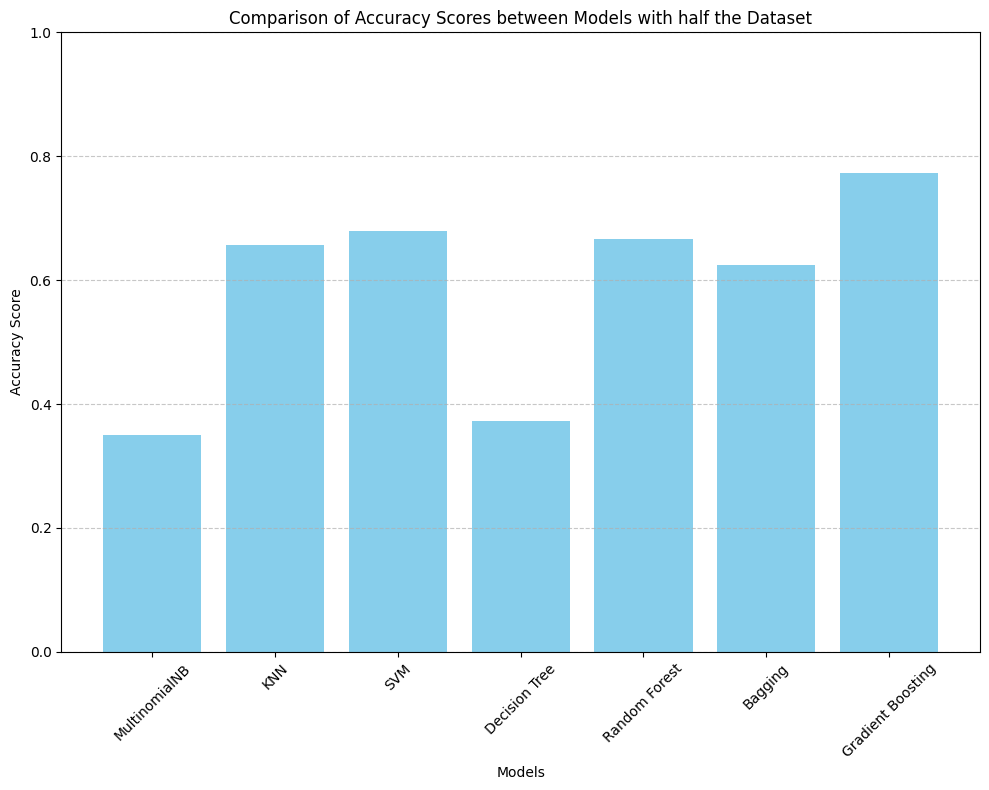

In [98]:
import matplotlib.pyplot as plt

model_names = [
    'MultinomialNB', 
    'KNN', 
    'SVM', 
    'Decision Tree', 
    'Random Forest', 
    'Bagging', 
    'Gradient Boosting'
]

# Accuracy scores for each model
accuracy_scores = [
    MC_accuracy_score_half, 
    KNN_accuracy_score_half, 
    SVM_accuracy_score_half, 
    DT_accuracy_score_half, 
    RF_accuracy_score_half, 
    Bagging_accuracy_score_half, 
    GB_accuracy_score_half
]


plt.figure(figsize=(10, 8))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.title('Comparison of Accuracy Scores between Models with half the Dataset')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Cross validation and Hyperparameter Tuning
We will implement cross validation and Hyperparameter tuning for selected base models which already show promissing results (hight accuracy and consistent confussion matrix) so:  
KNN,  
Random Forest,  
Bagging  

In [99]:
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [100]:
# Cross-validation implementation and K Hyperparameter tuning for KNN

# Create a copy of training data
X_CV = X_train.copy()
y_CV = y_train.copy()

# Define the number of folds
folds = 3

# Initialize variables for storing evaluation results and overall scores
eval_core = []
overall_scores = []

# We will check K in the range from 1 to 10
for neigh in range(1, 11):

    # Initialize variables to store fold-specific evaluation metrics
    fold_eval = []

    # Initialize k-fold cross-validation
    skf = StratifiedKFold(n_splits=folds, shuffle=False)

    for i, (train_index, val_index) in enumerate(skf.split(X_CV, y_CV)):
        # Select data from train and val based on fold indices
        X_CV_train, X_CV_val = X_CV[train_index], X_CV[val_index]
        y_CV_train, y_CV_val = y_CV.iloc[train_index], y_CV.iloc[val_index]

        # Train a KNN classifier with the given parameter k
        knn = KNeighborsClassifier(n_neighbors=neigh)
        knn.fit(X_CV_train, y_CV_train)

        # Predict on the val set
        y_CV_pred = knn.predict(X_CV_val)

        # Compute the accuracy metric for this fold
        accuracy = accuracy_score(y_CV_val, y_CV_pred)
        fold_eval.append(accuracy)

    # Calculate the mean performance across all folds for this k
    mean_accuracy = np.mean(fold_eval)
    print(f'n_neighbours_{neigh}:', mean_accuracy)

    # Append the mean accuracy to the overall scores
    overall_scores.append(mean_accuracy)

# Diagnostic
print('Overall scores:', overall_scores)

# Find the best performing k based on the highest accuracy
best_k = np.argmax(overall_scores) + 1  # Add 1 to convert to 1-based index
print("Best K for KNN:", best_k)

n_neighbours_1: 0.502043278004863
n_neighbours_2: 0.548593565278825
n_neighbours_3: 0.6354371674253326
n_neighbours_4: 0.6582914560554373
n_neighbours_5: 0.6694330901781065
n_neighbours_6: 0.6834339906804378
n_neighbours_7: 0.6931457466452859
n_neighbours_8: 0.6854314596711647
n_neighbours_9: 0.6928593790649376
n_neighbours_10: 0.6925725215486093
Overall scores: [0.502043278004863, 0.548593565278825, 0.6354371674253326, 0.6582914560554373, 0.6694330901781065, 0.6834339906804378, 0.6931457466452859, 0.6854314596711647, 0.6928593790649376, 0.6925725215486093]
Best K for KNN: 7


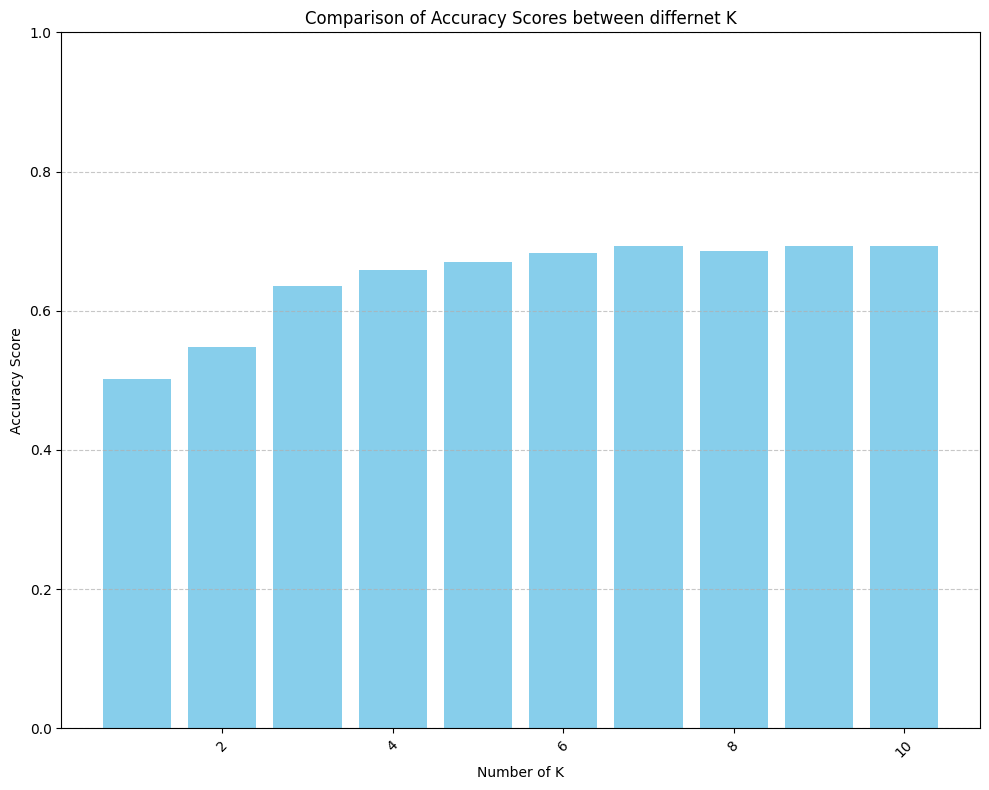

In [101]:
import matplotlib.pyplot as plt

# accuracy of Knn with diffent K's
Ks = (np.arange(0, 10) + 1)

# Accuracy scores for each model
accuracy_scores = overall_scores

plt.figure(figsize=(10, 8))
plt.bar(Ks, accuracy_scores, color='skyblue')
plt.title('Comparison of Accuracy Scores between differnet K')
plt.xlabel('Number of K')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [102]:
# Random Forest Hyperparameter tuning using Grid Search with cross validation throught gridsearch Object

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 20, 50],  # Adjust the range as needed
    'min_samples_split': [10, 30],
    'min_samples_leaf': [1, 10],    
    'max_features': ['sqrt', 'log2', None]
}

# Create a grid search object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Make predictions on your test data
predicted_rf = best_rf.predict(X_val)

# Calculate the accuracy of the tuned Random Forest
accuracy_rf = accuracy_score(y_val, predicted_rf)
print("Tuned Decision Tree Accuracy:", accuracy_rf)
print("Best Hyperparameters:", best_params)

KeyboardInterrupt: 

In [ ]:
# Final evaluation
predicted_test = best_rf.predict(X_test)
accuracy_test = accuracy_score(y_test, predicted_test)
print("Accuracy en conjunto de prueba:", accuracy_test)
print("Best Hyperparameters:", best_params)

NameError: name 'best_rf' is not defined

In [31]:
# Random Search for Random Forest with cross validation
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [10, 50, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 20, 50]
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=10, cv=3)
random_search_rf.fit(X_val, y_val)
best_rf = random_search_rf.best_estimator_
predicted_best_rf = best_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, predicted_best_rf)
print("Best Random Forest Accuracy:", accuracy_best_rf)
print(random_search_rf.best_params_)

Best Random Forest Accuracy: 0.5306666666666666
{'n_estimators': 50, 'max_features': 'log2', 'max_depth': None}


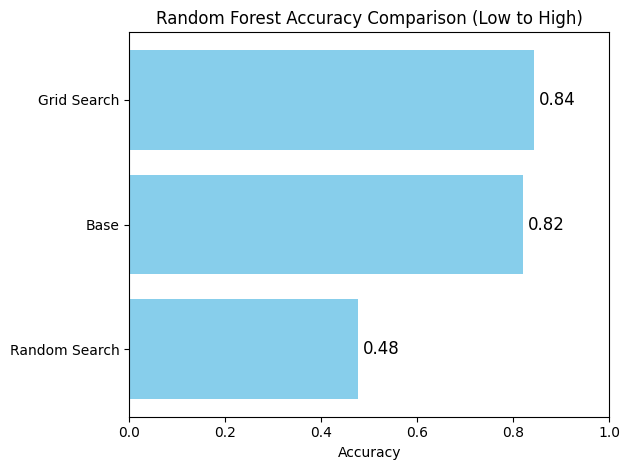

In [29]:
accuracy_rf = 0.844
results = [RF_accuracy_score, accuracy_rf, accuracy_best_rf]
classifiers = ['Base', 'Grid Search', 'Random Search']

# Sort results and classifiers in ascending order of accuracy
sorted_results, sorted_classifiers = zip(*sorted(zip(results, classifiers)))

# Create a bar plot
plt.barh(sorted_classifiers, sorted_results, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Random Forest Accuracy Comparison (Low to High)')
plt.xlim(0, 1.0)  # Set the x-axis limits from 0 to 1 for accuracy values

# Annotate the bars with accuracy values
for i, result in enumerate(sorted_results):
    plt.text(result + 0.01, i, f'{result:.2f}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

In [48]:
# Hyperparameter tuning for Bagging using Grid Search with cross validation
param_grid = {
              'n_estimators': [10, 20, 30],
              'max_samples': [0.8, 1, 2],
              'max_features': [0.5, 1],
              'bootstrap': [True, False],
              'bootstrap_features': [True, False],
              'warm_start': [True, False]
}

bc = BaggingClassifier()

grid_search = GridSearchCV(bc, param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_bc = grid_search.best_estimator_
predicted_best_bc = best_bc.predict(X_val)
accuracy_best_bc = accuracy_score(y_val, predicted_best_bc)
print("Best Bagging Accuracy:", accuracy_best_bc)
print("Best Hyperparameters:", grid_search.best_params_)

KeyboardInterrupt: 

In [41]:
# Final evaluation
predicted_test = best_bc.predict(X_test)
accuracy_test = accuracy_score(y_test, predicted_test)
print("Accuracy en conjunto de prueba:", accuracy_test)

Accuracy en conjunto de prueba: 0.3466666666666667


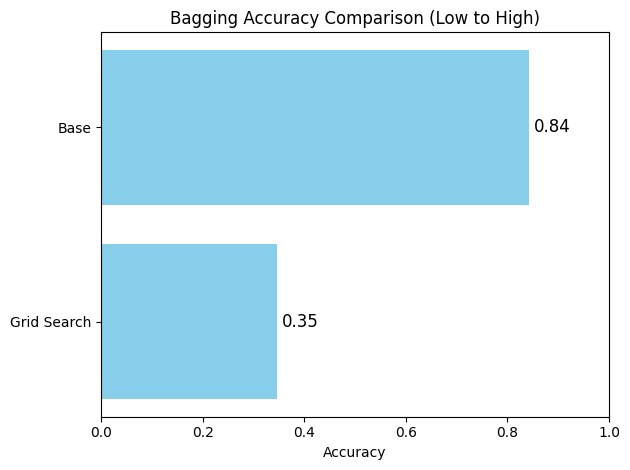

In [ ]:

results = [Bagging_accuracy_score, accuracy_test]
classifiers = ['Base', 'Grid Search']

# Sort results and classifiers in ascending order of accuracy
sorted_results, sorted_classifiers = zip(*sorted(zip(results, classifiers)))

# Create a bar plot
plt.barh(sorted_classifiers, sorted_results, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Bagging Accuracy Comparison (Low to High)')
plt.xlim(0, 1.0)  # Set the x-axis limits from 0 to 1 for accuracy values

# Annotate the bars with accuracy values
for i, result in enumerate(sorted_results):
    plt.text(result + 0.01, i, f'{result:.2f}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

# Advanced Machine learning

In [4]:
#load the data again so it's not vectorized
filename = "emotion_dataset.txt"

# Read the file
with open(filename, 'r') as file:
    lines = file.readlines()  

# Each line as a json dictionary
dataset = [json.loads(line) for line in lines]

df = pd.DataFrame(dataset)

In [23]:
df.summary()

AttributeError: 'DataFrame' object has no attribute 'summary'

## Neural Networks and Deep Learning

### Recurrent Neural Networks with Keras  

RNNs are particularly effective for sequence data, such as text, where the order of words matters. These models process words one by one, maintaining a memory of previous words, which allows them to capture dependencies in the data.

In [7]:
%pip install tensorflow
import warnings
warnings.filterwarnings('ignore')

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, padding='post', maxlen=150)

y = pd.get_dummies(df['label']).values  # One-hot encode labels

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=123)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Build LSTM Model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))  # 6 classes for emotion classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
resum = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.3192 - loss: 1.6460 - val_accuracy: 0.3360 - val_loss: 1.5644
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.3423 - loss: 1.5845 - val_accuracy: 0.3360 - val_loss: 1.5617
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.3393 - loss: 1.5856 - val_accuracy: 0.3360 - val_loss: 1.5692
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.3298 - loss: 1.5758 - val_accuracy: 0.3360 - val_loss: 1.5610
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.3551 - loss: 1.5788 - val_accuracy: 0.3360 - val_loss: 1.5576


In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: ", test_accuracy)
print("Test Loss: ", test_loss)

AttributeError: 'History' object has no attribute 'evaluate'

KeyError: 'loss'

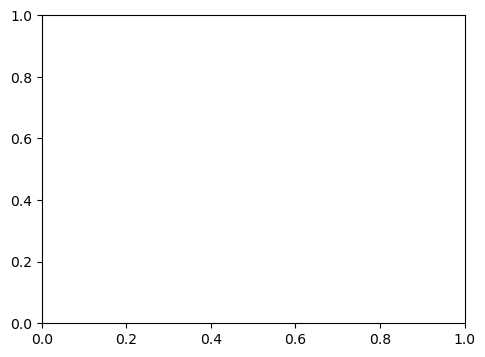

In [ ]:
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(resum.history["loss"], "--", c = "r", label="Train loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Loss history")
ax.legend()